<a href="https://colab.research.google.com/github/True-Duku/Kakaoku/blob/main/Reco_Faciale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation des packages

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import Isomap
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import offsetbox
%matplotlib inline

In [2]:
# Definition des dataframes

data = np.load('olivetti_faces.npy')
target = np.load('olivetti_faces_target.npy')

In [6]:
# Vérification en créant un data frame et en affichant un extrait de la table avec pandas

# Aplatir les images
data_flattened = data.reshape((400, 64*64))

# Convertir le tableau numpy en DataFrame
dfd = pd.DataFrame(data_flattened)

# Afficher les 5 premières lignes
print("Variable data ",dfd.head())


Variable data         0         1         2         3         4         5         6     \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

       7         8         9     ...      4086      4087      4088      4089  \
0  0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893  0.661157   
1  0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364  0.148760   
2  0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818  0.136364   
3  0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025  0.685950   
4  0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686  0.173554   

       4090      4091      4092      4093      4094  

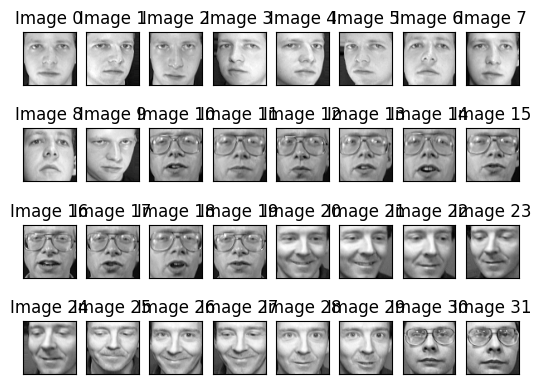

In [10]:
# Affichage du tableau dans un graphique avec le titre pour chaques images
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(data[i].reshape(64,64), cmap='gray')
    axi.set_title(f'Image {i}')

In [16]:
# Fonction Plot_component qui permet une visualisation les éléments sur un graphique bidimensionnel

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()

    if not prefit :
        proj = model.fit_transform(data)
    else:
        proj = data
    ax.plot(proj[:, 0], proj[:, 1], '.b')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # On ne montre pas le points trop proches
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

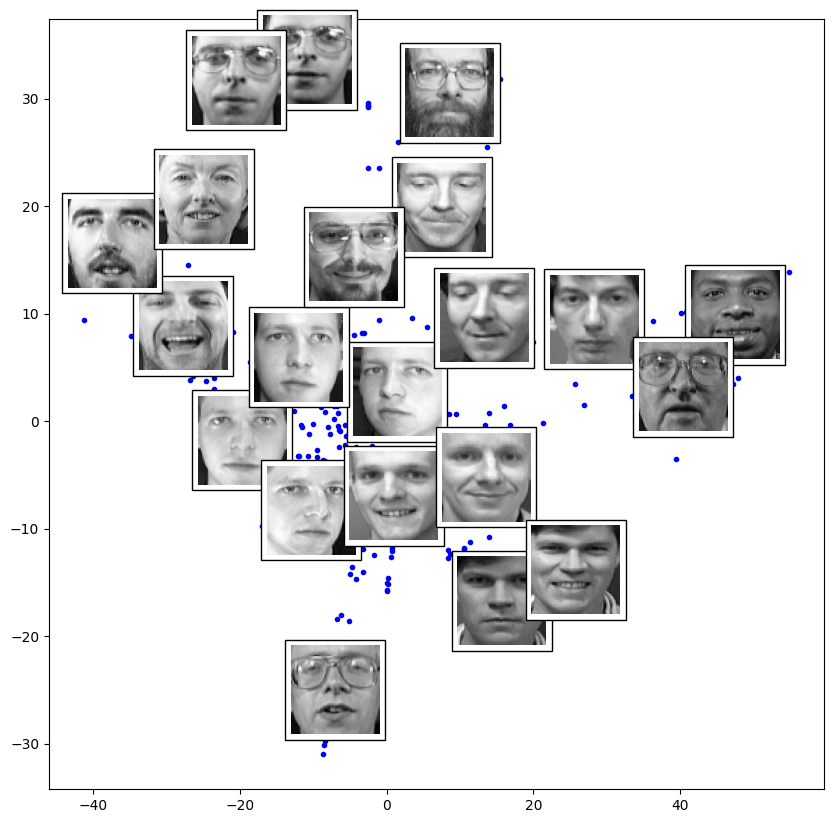

In [22]:
# Utilisation d'isomap pour idendifier les facteurs de varience des visages

fig, ax = plt.subplots(figsize=(10, 10))

plot_components(data_flattened,
                model=Isomap(n_components=2),
                images=data.reshape((-1, 64, 64)),
                cmap = 'gray',
                thumb_frac = .1)


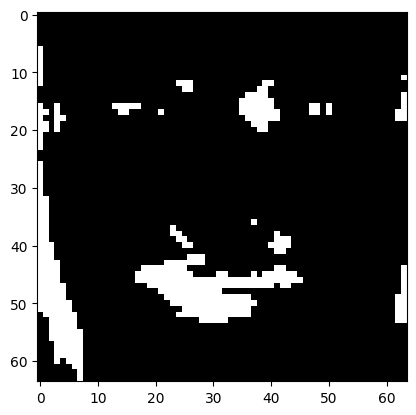

In [24]:
# Mise de coté d'une partie du jeu de données pour tester le modèle

X_train, X_test, y_train, y_test = train_test_split(data_flattened, target, test_size = .2, random_state = 42, shuffle = True)

sel = SelectPercentile(percentile = 90)
sel.fit(X_train, y_train)

X_train_red = sel.transform(X_train)
X_test_red = sel.transform(X_test)

plt.imshow(sel.get_support().reshape(64,64), cmap = 'gray_r')

In [28]:
# Graphique image réduite pour afficher une image a laquelle on a retiré certains pixel

def plot_reduced_image(image, selector):
    mask = selector.get_support()
    #toprint = [image[i] if mask[i] == True else 0 for i in range(sum(mask))]
    fullimg = np.array([])
    cnt = 0
    for i in range(64*64):
        if mask[i]:
            fullimg = np.append(fullimg, image[i-cnt])
        else:
            fullimg = np.append(fullimg, 0)
            cnt += 1
    plt.imshow(fullimg.reshape(64,64), cmap = 'gray')


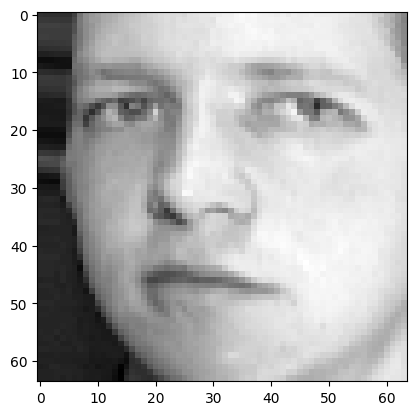

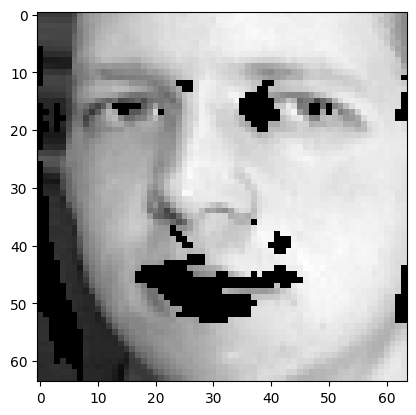

In [29]:
# Affichage de la première image du jeu d'entrainement

plt.figure()
plt.imshow(X_train[0].reshape(64,64), cmap = 'gray')
plt.show();
plot_reduced_image(X_train_red[0], sel)

In [30]:
# Application d'une PCA sur les images réduites

pca = PCA(n_components = .9)
X_train_pca = pca.fit_transform(X_train_red)
X_test_pca = pca.transform(X_test_red)

print(pca.n_components_)

57


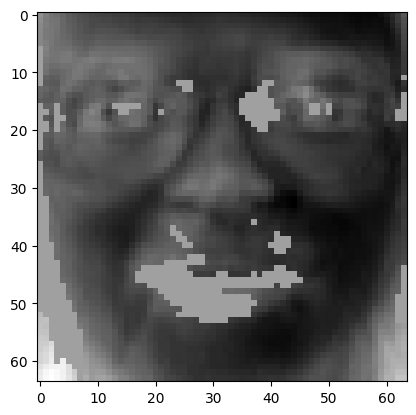

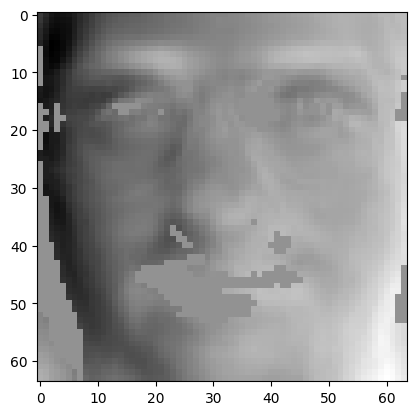

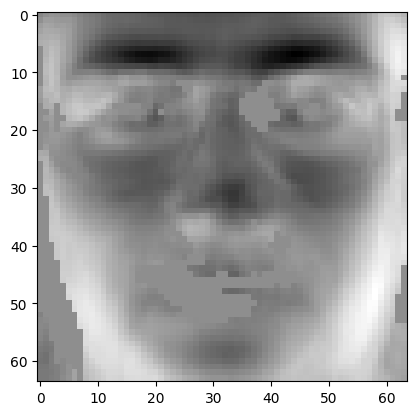

In [31]:
# Représentation graphique des premiers composants principaux de la PCA

for i in range(3):
    plt.figure()
    plot_reduced_image(pca.components_[i], sel)
    plt.show();

In [33]:
# Comparaison des performance des classificateurs sur le jeu de données original

svc = SVC(C = 1, kernel = 'linear')
svc.fit(X_train_pca, y_train)
print("Score on reduced data :", svc.score(X_test_pca, y_test))
svc.fit(X_train, y_train)
print("Score on full data :", svc.score(X_test, y_test) )

# Petit erreur dans le code car les score ne doivent pas être identiques normalement

Score on reduced data : 0.975
Score on full data : 0.975
